WE WILL USE CALIFORNIA HOUSING DATASET FROM scikit-learn to predict median house value using Linear Regression. There were some issues with Boston housing dataset from Kaggle

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import fetch_california_housing
house_data = fetch_california_housing()

In [3]:
print(house_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
house_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
target=house_data.target
target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [21]:
data_frame_house=pd.DataFrame(data=house_data.data,columns=house_data.feature_names)
data_frame_house['MedHouseVal']=target
data_frame_house.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [10]:
corr = data_frame_house.corr()
corr['MedHouseVal'].sort_values(ascending=True)

,MedHouseVal
Latitude,-0.144160
AveBedrms,-0.046701
Longitude,-0.045967
Population,-0.024650
AveOccup,-0.023737
HouseAge,0.105623
AveRooms,0.151948
MedInc,0.688075
MedHouseVal,1.000000


The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

THIS INDICATES THAT MEDHOUSEVAL HAS A HIGH CORRELATION WITH MEDINC AS EXPECTED


In [11]:
data_frame_house['MedHouseVal']=target

We have applied Linear Regression on the dataset with 80%-20% train-test split on the available data

In [12]:
from sklearn import model_selection
x=house_data.data
y=target
x_train, x_test, y_train, y_test=model_selection.train_test_split(x,y,test_size = 0.2, random_state=5)

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
from sklearn.metrics import r2_score,mean_squared_error

In [18]:
y_train_predicted = model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predicted)))
r2 = r2_score(y_train, y_train_predicted)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

# model evaluation for testing set
y_test_predicted = model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predicted)))
r2 = r2_score(y_test, y_test_predicted)

print("\nThe model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

print("\nCoefficients of the input parameter terms")
print("--------------------------------------")
print(model.coef_)
print("\n w0")
print("--------------------------------------")
print(model.intercept_)

The model performance for training set
--------------------------------------
RMSE is 0.7221082719887487
R2 score is 0.6047922425924859

The model performance for testing set
--------------------------------------
RMSE is 0.7323542382277765
R2 score is 0.6112568432827669

Coefficients of the input parameter terms
--------------------------------------
[ 4.38384807e-01  9.17273492e-03 -1.11793600e-01  6.79331516e-01
 -3.04158117e-06 -4.12179113e-03 -4.19560244e-01 -4.33473567e-01]

 w0
--------------------------------------
-36.89554297397996


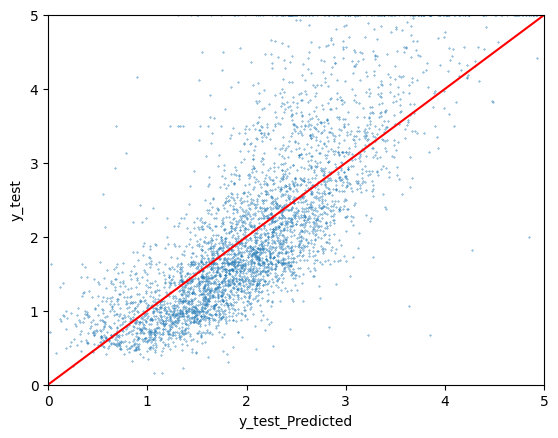

In [20]:
import matplotlib.pyplot as plt

# In ideal case y_test should be equal to y_test_predicted but the values are not exactly equal but close to line y=x with a few deviations
plt.plot([0,1,5],[0,1,5], color='red') #y=x line to compare predicted and actual outputs
plt.axis([0,5,0,5])
plt.scatter(y_test_predicted, y_test, s=.1)
plt.ylabel('y_test')
plt.xlabel('y_test_Predicted')
plt.show()